# 36_pytorch mnist - 이론 1

pytorch를 이용한 mnist 데이터 분류

In [16]:
import torch
import torch.nn as nn
            # nn : neural net
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Cuda 가능하면 Cuda 모드
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device)

Current cuda device is cpu


--------------------

In [7]:
#파라미터 설정
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

In [8]:
# MNIST 데이터 불러오기
train_data = datasets.MNIST(root = './dataset/MNIST',
                            train = True,           # 훈련용 데이터로 사전 설정 가능
                            # download = True,        # 최초 1회만 다운 받아서 사용하고, 다운 받아진 후에는 False
                            transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './dataset/MNIST',
                            train = False,      # 훈련용이 아님을 설정
                            transform = transforms.ToTensor())

print('number of training data: ', len(train_data))
print('number of test data: ', len(test_data))

0.4%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./dataset/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/MNIST/raw



102.8%


Extracting ./dataset/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/MNIST/raw



38.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



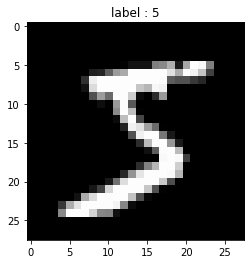

In [17]:
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap='gray')
                # squeeze : torchvision dataset의 한 세트는 CNN모델을 고려하여 3차원으로 설정되어있다.
                    # keras 에서는 (28, 28, 1) 로 채널이 마지막에 오지만
                    # torch 에서는 (1, 28, 28) 로 채널이 앞에 온다.
                # squeeze를 사용하면 차원을 없앤다.
plt.title('label : %s' %label)
plt.show()

In [18]:
# 미니 배치 구성 - data loader
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True)
                                                    # 읽어올 데이터셋 이름 지정
                                                                            # batch size 지정
                                                                                                # shuffle : 데이터의 순서를 학습하지 못하게 한다.
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()

In [20]:
print('{:15s} | {:<25s} | {}'.format('name','type','size'))
print('{:15s} | {:<25s} | {}'.format('Num of Batch','',len(train_loader)))
print('{:15s} | {:<25s} | {}'.format('first_batch',str(type(first_batch)),len(first_batch)))
print('{:15s} | {:<25s} | {}'.format('first_batch[0]', str(type(first_batch[0])), first_batch[0].shape))    # 데이터 규격
print('{:15s} | {:<25s} | {}'.format('first_batch[1]',str(type(first_batch[1])), first_batch[1].shape)) # 라벨
                # < : 왼쪽 정렬 , > : 오른쪽 정렬

name            | type                      | size
Num of Batch    |                           | 1200
first_batch     | <class 'list'>            | 2
first_batch[0]  | <class 'torch.Tensor'>    | torch.Size([50, 1, 28, 28])
first_batch[1]  | <class 'torch.Tensor'>    | torch.Size([50])
